# Outlier Detection Using Standard Deviation or Z-score

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('data_placement.csv')

In [40]:
df.sample(5)

,cgpa,marks,placed
770,7.33,67,1
273,7.00,9,0
870,6.67,15,1
384,7.03,33,0
691,7.32,14,0


In [4]:
df.shape

(1000, 3)

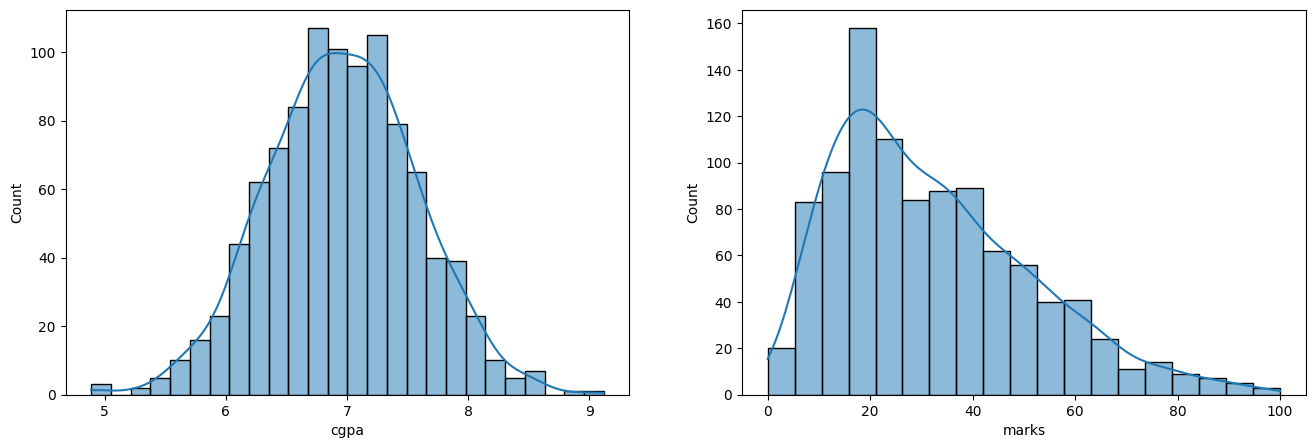

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['marks'], kde=True)

plt.show()

## Observation:
Upon observing the data, it becomes evident that the **cgpa** column follows a normal distribution, while the **placement_exam_marks** column exhibits right-skewness. Since z-score approach is applicable only to the normal distribution, so we apply it to **cgpa** column.

In [6]:
print('The min value in CGPA column', df['cgpa'].min())
print('The max value in CGPA column', df['cgpa'].max())
print('The mean value in CGPA column', df['cgpa'].mean())
print('The std dev in CGPA column', df['cgpa'].std())

The min value in CGPA column 4.89
The max value in CGPA column 9.12
The mean value in CGPA column 6.96124
The std dev in CGPA column 0.6158978751323896


Any value that is **far away from mean would be outliers**

# Using Standard Deviation

In [7]:
# Finding boundary value using threshold of 3 standard deviation
mean    = df['cgpa'].mean()
std_dev = df['cgpa'].std()

lowest_limit = mean - 3*std_dev
upper_limit  = mean + 3*std_dev

print('lowest boundary :', lowest_limit)
print('highest boundary :',upper_limit)

lowest boundary : 5.113546374602832
highest boundary : 8.808933625397168


In [8]:
# Finding the outliers

mask = (df['cgpa'] < lowest_limit) | (df['cgpa'] > upper_limit)

outliers = df[mask]

print(outliers)

     cgpa  marks  placed
485  4.92     44       1
995  8.87     44       1
996  9.12     65       1
997  4.89     34       0
999  4.90     10       1


We see that there are 3 rows with values below the lower boundary and 2 rows with values above the highest boundary with total=5 rows

In [9]:
# Change threshold to 2.6 standard deviation, you will see more outliers
mean    = df['cgpa'].mean()
std_dev = df['cgpa'].std()

lowest_limit = mean - 2.6*std_dev
upper_limit  = mean + 2.6*std_dev

print('lowest boundary :', lowest_limit)
print('highest boundary :',upper_limit)

lowest boundary : 5.359905524655787
highest boundary : 8.562574475344213


In [10]:
# Now we see more outliers

mask = (df['cgpa'] < lowest_limit) | (df['cgpa'] > upper_limit)

outliers = df[mask]

print(outliers)

     cgpa  marks  placed
278  5.23     17       1
485  4.92     44       1
815  5.27     43       0
995  8.87     44       1
996  9.12     65       1
997  4.89     34       0
998  8.62     46       1
999  4.90     10       1


# Trimming
To address the outliers, we will employ the trimming approach and eliminate all rows with outliers in our dataset.

In [11]:
# trim all values whose cgpa < 8.80 and cgpa > 5.11
mask = (df['cgpa'] > 5.11) & (df['cgpa'] < 8.80) 

df_trim = df[mask]

print(df_trim.sample(10))

     cgpa  marks  placed
492  8.50     21       1
201  6.67     15       0
185  7.30     31       0
569  7.08     30       0
234  8.09     36       0
257  5.74     76       0
451  5.94     31       0
825  6.30     23       0
952  7.71     25       1
353  6.82     28       1


In [12]:
# Verify 
mask = (df_trim['cgpa'] < 5.11) | (df_trim['cgpa'] > 8.80)

outliers = df_trim[mask]

print(outliers)

Empty DataFrame
Columns: [cgpa, marks, placed]
Index: []


In [13]:
# 5 rows that were outliers are gone
print(f"shape:{df_trim.shape}") # rows,columns

shape:(995, 3)


In [14]:

print(f"df_trim:\n{df_trim}")

df_trim:
     cgpa  marks  placed
0    7.19     26       1
1    7.46     38       1
2    7.54     40       1
3    6.42      8       1
4    7.23     17       0
..    ...    ...     ...
991  7.04     57       0
992  6.26     12       0
993  6.73     21       1
994  6.48     63       0
998  8.62     46       1

[995 rows x 3 columns]


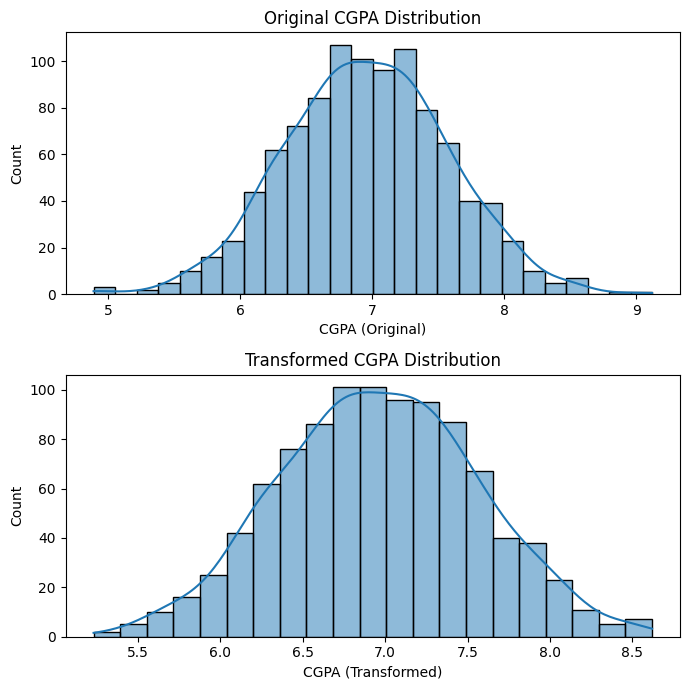

In [15]:
plt.figure(figsize=(7, 7))

# First subplot (top)
plt.subplot(2, 1, 1)
sns.histplot(df['cgpa'], kde=True)
plt.xlabel("CGPA (Original)")
plt.title("Original CGPA Distribution")

# Second subplot (bottom)
plt.subplot(2, 1, 2)
sns.histplot(df_trim['cgpa'], kde=True)
plt.xlabel("CGPA (Transformed)")
plt.title("Transformed CGPA Distribution")

plt.tight_layout()
plt.show()


# Using Z-score

In [16]:
# Calculate the Z-score column cgpa
mean    = df['cgpa'].mean()
std_dev = df['cgpa'].std()

df['cgpa_zscore'] = (df['cgpa'] - mean)/std_dev

In [17]:
print(df.sample(10))

     cgpa  marks  placed  cgpa_zscore
950  6.65     33       1    -0.505344
140  6.85     22       1    -0.180614
153  6.29     10       1    -1.089856
410  7.36     37       1     0.647445
707  6.86     11       1    -0.164378
983  6.81     11       1    -0.245560
788  6.54     19       0    -0.683945
224  7.15     19       0     0.306479
785  6.07     29       1    -1.447058
338  7.45     46       1     0.793573


In [18]:
# Any value that is < -3 or > +3 is an outlier.

mask = (df['cgpa_zscore'] < -3) | (df['cgpa_zscore'] > +3)

outliers = df[mask]

print(outliers)

     cgpa  marks  placed  cgpa_zscore
485  4.92     44       1    -3.314251
995  8.87     44       1     3.099150
996  9.12     65       1     3.505062
997  4.89     34       0    -3.362960
999  4.90     10       1    -3.346724


We see that there are 3 rows with values below the lower boundary(-3) and 2 rows with values above the highest boundary(+3) with total=5 rows

In [19]:
# Now use different threshold: Any value that is < -2.6 or > +2.6 is an outlier.
mask = (df['cgpa_zscore'] < -2.6) | (df['cgpa_zscore'] > +2.6)

outliers = df[mask]

print(outliers)

     cgpa  marks  placed  cgpa_zscore
278  5.23     17       1    -2.810921
485  4.92     44       1    -3.314251
815  5.27     43       0    -2.745975
995  8.87     44       1     3.099150
996  9.12     65       1     3.505062
997  4.89     34       0    -3.362960
998  8.62     46       1     2.693239
999  4.90     10       1    -3.346724


The number os outliers increased.

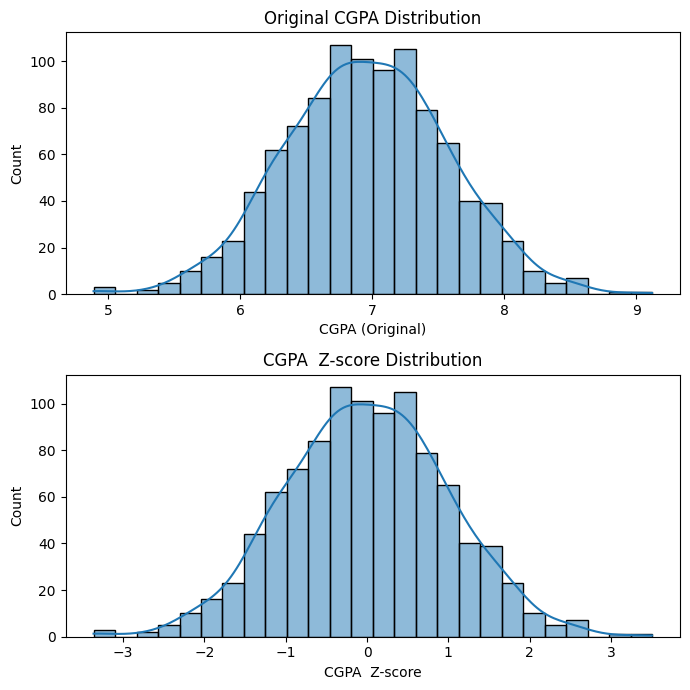

In [20]:
plt.figure(figsize=(7, 7))

# First subplot (top)
plt.subplot(2, 1, 1)
sns.histplot(df['cgpa'], kde=True)
plt.xlabel("CGPA (Original)")
plt.title("Original CGPA Distribution")

# Second subplot (bottom)
plt.subplot(2, 1, 2)
sns.histplot(df['cgpa_zscore'], kde=True)
plt.xlabel("CGPA  Z-score")
plt.title("CGPA  Z-score Distribution")

plt.tight_layout()
plt.show()


# Trimming
To address the outliers, we will employ the trimming approach and eliminate all rows with outliers in our dataset.

In [28]:
# Trimming: removing outliers from df

mask = (df["cgpa_zscore"] >= -3) & (df["cgpa_zscore"] <= 3)

df_trimmed = df[mask]

print(df_trimmed)

     cgpa  marks  placed  cgpa_zscore
0    7.19     26       1     0.371425
1    7.46     38       1     0.809810
2    7.54     40       1     0.939701
3    6.42      8       1    -0.878782
4    7.23     17       0     0.436371
..    ...    ...     ...          ...
991  7.04     57       0     0.127878
992  6.26     12       0    -1.138565
993  6.73     21       1    -0.375452
994  6.48     63       0    -0.781363
998  8.62     46       1     2.693239

[995 rows x 4 columns]


In [29]:
# verify outliers are gone
outliers = df_trimmed[(df_trimmed['cgpa_zscore'] > 3) | (df_trimmed['cgpa_zscore'] < -3)]
print(outliers)

Empty DataFrame
Columns: [cgpa, marks, placed, cgpa_zscore]
Index: []


In [30]:
# 5 rows are eliminated. So the count is 5 less: 1000 - 5 = 995

print(f"shape:{df_trimmed.shape}") # rows,columns

shape:(995, 4)


In [31]:

print(f"df_trim:\n{df_trimmed}")

df_trim:
     cgpa  marks  placed  cgpa_zscore
0    7.19     26       1     0.371425
1    7.46     38       1     0.809810
2    7.54     40       1     0.939701
3    6.42      8       1    -0.878782
4    7.23     17       0     0.436371
..    ...    ...     ...          ...
991  7.04     57       0     0.127878
992  6.26     12       0    -1.138565
993  6.73     21       1    -0.375452
994  6.48     63       0    -0.781363
998  8.62     46       1     2.693239

[995 rows x 4 columns]


# STOP

# Capping

Let’s apply the capping method to address the outliers in the dataset.

To handle outliers using the capping method, we will **replace** all values above the upper limit with the upper limit value and all values below the lower limit with the lower limit value.

In [37]:
# cap the outliers
df_cap = df.copy()

df_cap["cgpa_zscore"] = df_cap["cgpa_zscore"].clip(lower=-3, upper=+3)

print(df_cap)

     cgpa  marks  placed  cgpa_zscore
0    7.19     26       1     0.371425
1    7.46     38       1     0.809810
2    7.54     40       1     0.939701
3    6.42      8       1    -0.878782
4    7.23     17       0     0.436371
..    ...    ...     ...          ...
995  8.87     44       1     3.000000
996  9.12     65       1     3.000000
997  4.89     34       0    -3.000000
998  8.62     46       1     2.693239
999  4.90     10       1    -3.000000

[1000 rows x 4 columns]


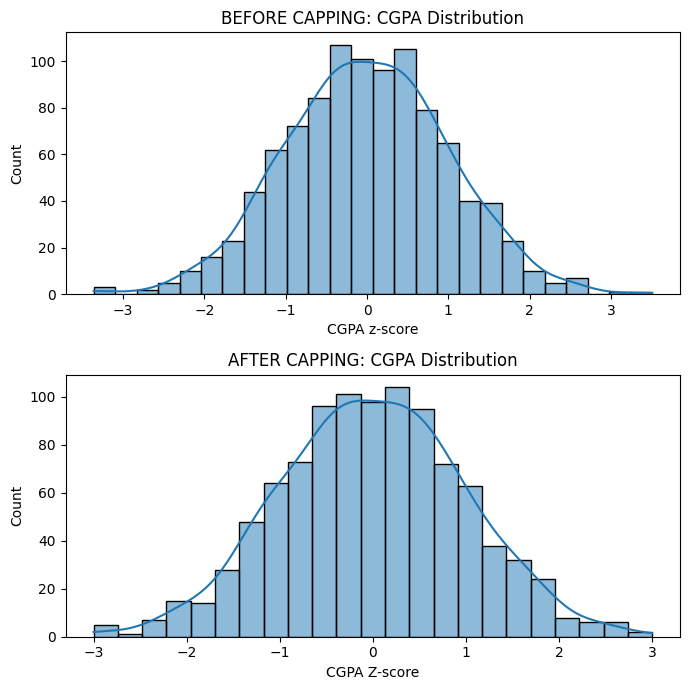

In [36]:
plt.figure(figsize=(7, 7))

# First subplot (top)
plt.subplot(2, 1, 1)
sns.histplot(df['cgpa_zscore'], kde=True)
plt.xlabel("CGPA z-score")
plt.title("BEFORE CAPPING: CGPA Distribution")

# Second subplot (bottom)
plt.subplot(2, 1, 2)
sns.histplot(df_cap['cgpa_zscore'], kde=True)
plt.xlabel("CGPA Z-score")
plt.title("AFTER CAPPING: CGPA Distribution")

plt.tight_layout()
plt.show()


In [25]:
# verify that there are no outliers
outliers = df_cap[(df_cap['cgpa_zscore'] > 3) | (df_cap['cgpa_zscore'] < -3)]
print(outliers)

Empty DataFrame
Columns: [cgpa, marks, placed, cgpa_zscore]
Index: []


In [26]:
print(df_cap.shape)

(1000, 4)
